## Práctica Guiada Web Scraping con Regular Expressions

Las Regular Expressions son una forma muy flexible de realizar búsquedas dentro de textos, por lo que suele ser muy útil para extraer información de páginas web. 

#### Ejemplo 1:
    Usamos regex para extraer los títulos del diario La Prensa.


In [0]:
#Importamos las librerias necesarias

import requests
import re

In [0]:
url = 'http://www.laprensa.com.ar/'

head = {'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) '
           'Chrome/59.0.3071.115 Safari/537.36'}

resp = requests.get(url, headers = head)

In [0]:
#Vemos el código de estado
resp.status_code

200

In [0]:
#Vemos los headers que enviamos
resp.request.headers

{'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [0]:
resp.text[:100]

'\r\n\r\n\r\n<!DOCTYPE html>\r\n<html>\r\n<head>\r\n<meta http-equiv="content-type" content="text/html; charset=u'

### Los que nos interesan particularmente son resp.text y resp.content, que guardan el contenido de la página como string o como bytes respectivamente 

Para utilizar Regex en Python, usamos el módulo re. Las siguientes funciones nos proporcionan la mayor parte de la funcionalidad necesaria:

    - re.findall(pattern, string) 
    Busca dentro de string utilizando pattern, devolviendo una lista con todos los resultados.
    - re.search(pattern, string)
    Busca la primera coincidencia con pattern dentro de string.
    - re.sub(pattern, replace, string)
    Reemplaza lo que coincida con pattern por replace, dentro de string.

In [0]:
#Usamos el navegador para identificar la estructura de los datos que queremos extraer y creamos el patrón de búsqueda
pattern = 'class="title".+?>(.+?)<'

In [0]:
#Usamos findall para encontrar todas las coincidencias
titles = [m for m in re.findall(pattern, resp.text, flags = re.DOTALL)]

In [0]:
titles

['Peña: “No hay que pensar en fantasmas" sobre las "exigencias" del FMI',
 'Los cuatro nuevos corredores del Metrobus beneficiarán a casi 1 millón de usuarios bonaerenses',
 'Aranguren: “retrotraer” las tarifas eléctricas a 2017 tendría un costo de 170.000 millones de pesos',
 'Denuncian que hay 2.000 Electrodependientes que siguen pagando la luz',
 'Empiezan a regir las multas para quienes ingresen sin permiso al centro',
 'Mayumana, con el ritmo en la sangre',
 'Penas más duras contra la corrupción',
 'El orgullo de una escuela que no para',
 'Qué vendrá tras las turbulencias',
 'Tormenta perfecta sobre Buenos Aires',
 'El futuro del cerebro:\xad un debate necesario\xad',
 'Cómo incorporar nutrientes esenciales en la alimentación de los niños',
 'Por qué no se debe subestimar el dolor en las piernas y los pies',
 'Literatura que indaga en lo real',
 'Un proceso digno de Kafka',
 'Formas sutiles y poderosas del mal',
 'Lo irracional irrumpe en Suiza',
 'Los sabores bolivianos llegan a

### Ejercicio 2: 

Descargamos imagenes de Google Images, y las mostramos.

In [0]:
#Vamos a necesitar lo siguiente
import matplotlib.pyplot as plt
import codecs
from PIL import Image
from io import BytesIO

In [0]:
query1, query2 = 'Digital', 'House'

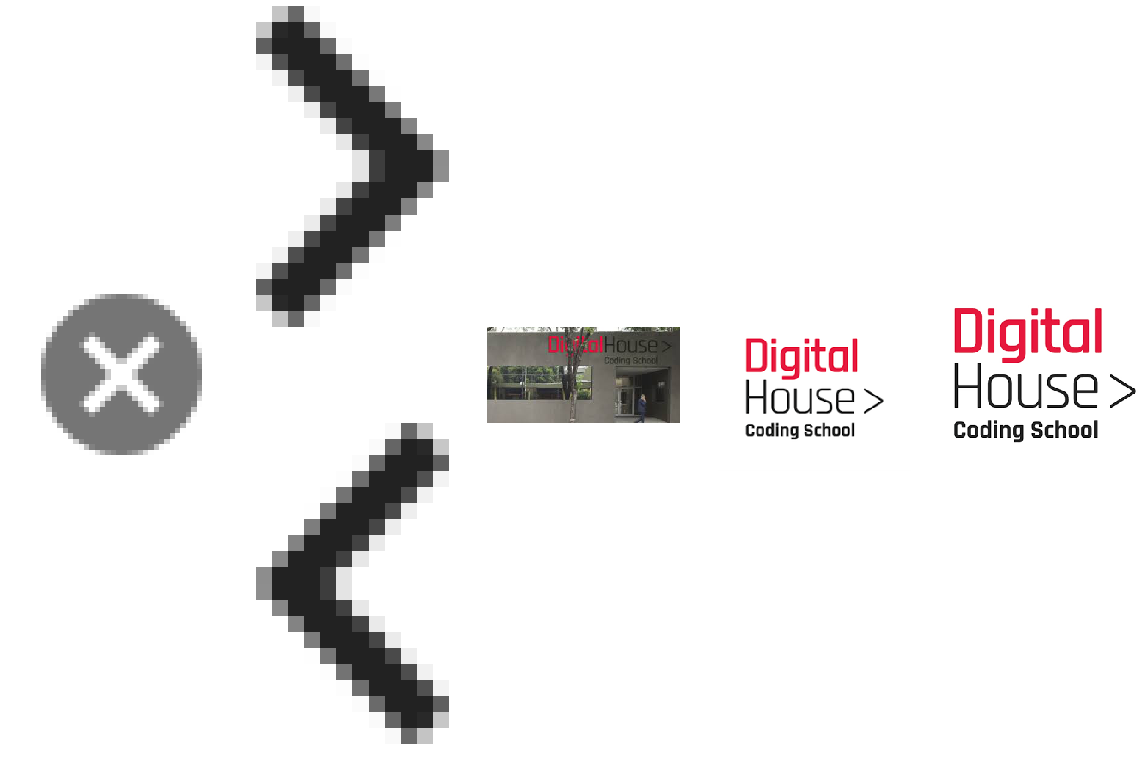

In [0]:
#La query se inserta en la URL

url = 'https://www.google.com.ar/search?q={0}+{1}&source=lnms&tbm=isch'.format(query1, query2)

search = requests.get(url, headers = head)

imgs = re.findall(b'base64,(.+?)[)"]', search.content)

q = 5

fig = plt.figure(figsize = (20,20))

for i in range(q):
    a = fig.add_subplot(1,q,i+1)
    img_bs64 = imgs[i]
    img_by = codecs.decode(img_bs64, 'base64')
    buf = BytesIO(img_by)
    img = Image.open(buf)
    plt.imshow(img)
    plt.axis('off')
    
    #Si quisieramos guardarlas
    
    #with open(filename + '.png', 'w') as out:
    #   out.write(img_by)
    
plt.show()